In [18]:
import importlib
from data import load_image_data, load_tabular_data, load_text_data, train_val_test_split, preprocess_text, preprocess_image
import report
importlib.reload(report)
from models import LinearModel, LogisticRegression, DenseFeedForward
from optimizers import SGD, RMSprop, train, mean_squared_error, BinaryCrossEntropy, categorical_cross_entropy
import numpy as np

Iter 000 | Train Loss: 278.646699 | Val Loss: 311.781208
Iter 010 | Train Loss: 32.771107 | Val Loss: 41.321270
Iter 020 | Train Loss: 6.346313 | Val Loss: 8.795305
Iter 030 | Train Loss: 3.318800 | Val Loss: 4.535763
Iter 040 | Train Loss: 2.836947 | Val Loss: 3.641900
Iter 050 | Train Loss: 2.649578 | Val Loss: 3.333790
Iter 060 | Train Loss: 2.505062 | Val Loss: 3.134298
Iter 070 | Train Loss: 2.375441 | Val Loss: 2.968236
Iter 080 | Train Loss: 2.256874 | Val Loss: 2.823849
Iter 090 | Train Loss: 2.148154 | Val Loss: 2.692375
Iter 100 | Train Loss: 2.048434 | Val Loss: 2.571653
Iter 110 | Train Loss: 1.956963 | Val Loss: 2.460558
Iter 120 | Train Loss: 1.873059 | Val Loss: 2.358093
Iter 130 | Train Loss: 1.796094 | Val Loss: 2.263538
Iter 140 | Train Loss: 1.725494 | Val Loss: 2.176253
Iter 150 | Train Loss: 1.660732 | Val Loss: 2.095651
Iter 160 | Train Loss: 1.601324 | Val Loss: 2.021201
Iter 170 | Train Loss: 1.546827 | Val Loss: 1.952415
Iter 180 | Train Loss: 1.496835 | Val Lo

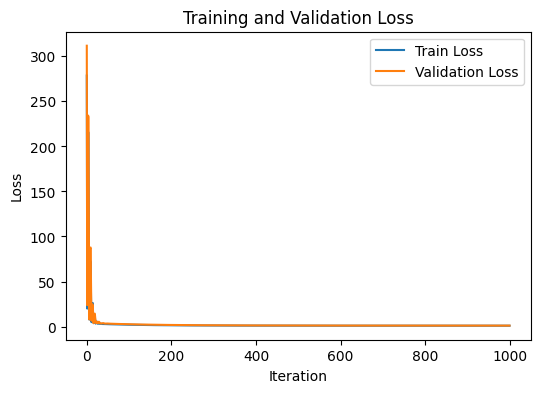

Regression Metrics:
 MSE: 0.9738
 R²: 0.9916


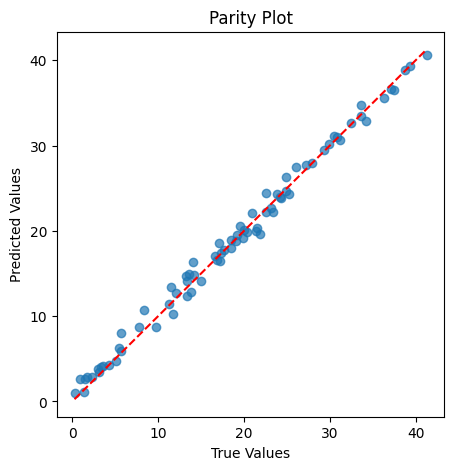


Sample Predictions:
True: 31.153538879918, Pred: 30.6133
True: 2.3407678332038158, Pred: 2.8389
True: 24.855603632217267, Pred: 26.3355
True: 5.497071339308074, Pred: 6.2986
True: 13.637678134869322, Pred: 14.9368
True: 17.69214310936047, Pred: 17.7219
True: 8.395382456796824, Pred: 10.7154
True: 24.2400809076288, Pred: 23.9615
True: 20.90819456493076, Pred: 22.1316
True: 27.879608712152788, Pred: 27.9847


In [15]:
#Case 1: Simple Linear Regression
#step 1: load the data 
X, y = load_tabular_data("data/linear.txt", target_col = -1, sep=r"\s+")
y = y.reshape(-1, 1)
#split the data 
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, y, ratios=(0.7, 0.15, 0.15), seed = 42)
#model
model = LinearModel(input_dim=X_train.shape[1], output_dim=1)
#optimize 
optimizer = SGD(lr=0.003, l2=1e-3, momentum = 0.8, early_stopping_patience=20)
#train 
train_losses, val_losses = train(model,optimizer,mean_squared_error,X_train, y_train,X_val, y_val,max_iters=1000,two_sided=True)
#evaluate model on test 
y_pred = model.forward(X_test)
#calling report
report.report(model, X_test, y_test,y_pred,task="regression", train_losses=train_losses, val_losses=val_losses,save_path = "output/linear_regression")


[DEBUG] Raw X shape: (50000, 1), y shape: (50000,)
[DEBUG] Class distribution: [256 244]
[DEBUG] Feature matrix shape: (500, 300)
[DEBUG] Sample sparsity: 0.2187
[DEBUG] Initial mean prediction: 0.5031
Iter 000 | Train Loss: 0.693479 | Val Loss: 0.693551
Iter 010 | Train Loss: 0.692976 | Val Loss: 0.692963
Iter 020 | Train Loss: 0.692588 | Val Loss: 0.692499
Iter 030 | Train Loss: 0.692308 | Val Loss: 0.692154
Iter 040 | Train Loss: 0.692104 | Val Loss: 0.691896
Iter 050 | Train Loss: 0.691956 | Val Loss: 0.691702
Iter 060 | Train Loss: 0.691847 | Val Loss: 0.691555
Iter 070 | Train Loss: 0.691768 | Val Loss: 0.691443
Iter 080 | Train Loss: 0.691710 | Val Loss: 0.691357
Iter 090 | Train Loss: 0.691666 | Val Loss: 0.691291
Iter 099 | Train Loss: 0.691637 | Val Loss: 0.691244
[DEBUG] Post-training mean prediction: 0.4788


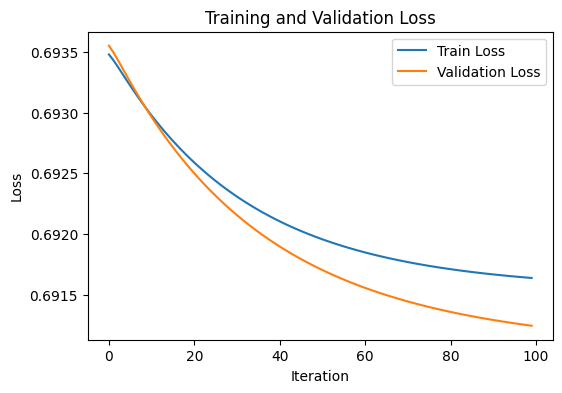

Classification Metrics:
 Accuracy: 0.413
 Precision: 0.000
 Recall: 0.000
 F1-score: 0.000


/Users/sazankhalid/myTorch/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


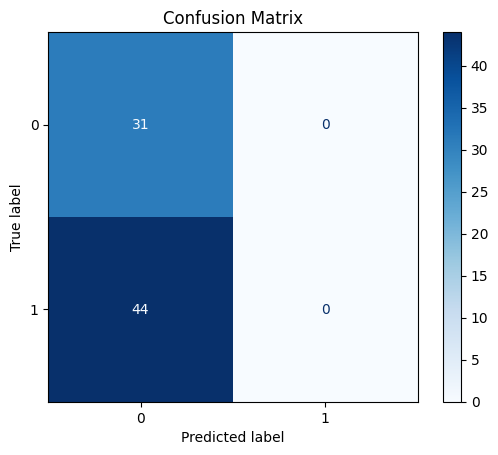


Sample Predictions:
True: 1.0, Pred: 0.4804
True: 1.0, Pred: 0.4791
True: 0.0, Pred: 0.4832
True: 0.0, Pred: 0.4797
True: 1.0, Pred: 0.4745
True: 0.0, Pred: 0.4789
True: 1.0, Pred: 0.4791
True: 0.0, Pred: 0.4775
True: 1.0, Pred: 0.4797
True: 0.0, Pred: 0.4784


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from data import load_tabular_data, preprocess_text, train_val_test_split
from models import LogisticRegression  # or DenseFeedForward for MLP
from optimizers import SGD, BinaryCrossEntropy
import report

#load data
X_pre, y = load_tabular_data("data/imdb.csv", target_col=-1, sep=",")
print(f"[DEBUG] Raw X shape: {X_pre.shape}, y shape: {y.shape}")

# Flatten to list of strings
X_pre = X_pre.flatten().tolist()

# Tokenize
all_tokens, tokenized_texts = [], []
for text in X_pre:
    tokens = preprocess_text(text)
    tokenized_texts.append(tokens)
    all_tokens.extend(tokens)

# Build vocabulary (bag-of-words)
token_counts = Counter(all_tokens)
most_common = [tok for tok, _ in token_counts.most_common(300)]  # top 3k words
vocab = {tok: i for i, tok in enumerate(sorted(most_common))}

# Build feature matrix
X_numeric = np.zeros((len(tokenized_texts), len(vocab)), dtype=np.float32)
for i, tokens in enumerate(tokenized_texts):
    for tok in tokens:
        idx = vocab.get(tok)
        if idx is not None:
            X_numeric[i, idx] += 1.0

# Normalize row-wise (TF scaling)
X_numeric = X_numeric / (X_numeric.sum(axis=1, keepdims=True) + 1e-8)

# Encode labels (0 = negative, 1 = positive)
y = np.array([1 if label.lower() == "positive" else 0 for label in y], dtype=np.float32)

# Optional: Subsample for faster dev (recommended by chat gpt as my code was slow)
subset_idx = np.random.choice(len(X_numeric), size=500, replace=False)
X_numeric, y = X_numeric[subset_idx], y[subset_idx]

print(f"[DEBUG] Class distribution: {np.bincount(y.astype(int))}")
print(f"[DEBUG] Feature matrix shape: {X_numeric.shape}")
print(f"[DEBUG] Sample sparsity: {np.count_nonzero(X_numeric)/X_numeric.size:.4f}")

# split data
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(
    X_numeric, y, ratios=(0.7, 0.15, 0.15), seed=42
)

#model
classifier_model = LogisticRegression(input_dim=X_train.shape[1])
#optimizer
classifier_optimizer = SGD(lr=0.03, momentum=0.5, l2=0.02, early_stopping_patience=30)

# debug code by chat gpt 
y_pred_init = classifier_model.forward(X_val)
print(f"[DEBUG] Initial mean prediction: {y_pred_init.mean():.4f}")

#train
train_losses, val_losses = train(
    classifier_model,
    classifier_optimizer,
    BinaryCrossEntropy,
    X_train, y_train,
    X_val, y_val,
    max_iters=100,
    eps=1e-4,
    two_sided=False 
)

#evaluate
y_pred = classifier_model.forward(X_test)
print(f"[DEBUG] Post-training mean prediction: {y_pred.mean():.4f}")

#report
report.report(
    model=classifier_model,
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred,
    task="binary_classification",
    train_losses=train_losses,
    val_losses=val_losses,
    save_path="output/imdb_binary"
)

In [ ]:
# # Case 2: IMDB for Binary Classification
# from collections import Counter
# import numpy as np
# import matplotlib.pyplot as plt
# import report

# # === 1. Load Data ===
# X_pre, y = load_tabular_data("data/imdb.csv", target_col=-1, sep=",")
# print(f"[DEBUG] Raw X shape: {X_pre.shape}, y shape: {y.shape}")

# # Flatten and tokenize text
# X_pre = X_pre.flatten().tolist()
# all_tokens, tokenized_texts = [], []
# for texts in X_pre:
#     tokens = preprocess_text(texts)
#     tokenized_texts.append(tokens)
#     all_tokens.extend(tokens)

# # === 2. Build Vocabulary & Feature Matrix ===
# token_counts = Counter(all_tokens)
# most_common = [tok for tok, _ in token_counts.most_common(3000)]  # larger vocab
# vocab = {tok: i for i, tok in enumerate(sorted(most_common))}

# X_numeric = np.zeros((len(tokenized_texts), len(vocab)), dtype=np.float32)
# for i, tokens in enumerate(tokenized_texts):
#     for tok in tokens:
#         idx = vocab.get(tok)
#         if idx is not None:
#             X_numeric[i, idx] = 1.0  # binary presence

# # Encode labels (0/1)
# y = np.array([1 if label.lower() == "positive" else 0 for label in y], dtype=np.float32)

# # Subsample for speed
# subset_idx = np.random.choice(len(X_numeric), size=250, replace=False)
# X_numeric, y = X_numeric[subset_idx], y[subset_idx]

# print(f"[DEBUG] Class distribution: {np.bincount(y.astype(int))}")
# print(f"[DEBUG] Feature matrix shape: {X_numeric.shape}")
# print(f"[DEBUG] Sample sparsity: {np.count_nonzero(X_numeric) / X_numeric.size:.4f}")

# # data split
# X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(
#     X_numeric, y, ratios=(0.7, 0.15, 0.15), seed=42
# )

# #model 
# classifier_model = LogisticRegression(input_dim=X_train.shape[1])
# print(f"[DEBUG] Model initialized with {classifier_model.num_params()} parameters")

# classifier_optimizer = SGD(lr=0.009,momentum=0.5,l2=0.02,early_stopping_patience=30)

# #asked chatgpt to give me stats to debug
# y_pred_init = classifier_model.forward(X_val)
# print(f"[DEBUG] Initial mean predicted probability: {y_pred_init.mean():.4f}")
# print(f"[DEBUG] Initial min/max predicted probability: {y_pred_init.min():.4f}/{y_pred_init.max():.4f}")

# #train
# train_losses, val_losses = train(
#     classifier_model,
#     classifier_optimizer,
#     BinaryCrossEntropy,
#     X_train, y_train,
#     X_val, y_val,
#     max_iters=300,
#     eps=1e-4,       
#     two_sided=False
# )
# #evaluate
# y_pred = classifier_model.forward(X_test)
# print(f"[DEBUG] Post-training mean predicted probability: {y_pred.mean():.4f}")
# print(f"[DEBUG] Post-training min/max predicted probability: {y_pred.min():.4f}/{y_pred.max():.4f}")

# #report
# report.report(
#     model=classifier_model,
#     X_test=X_test,
#     y_test=y_test,
#     y_pred=y_pred,
#     task="binary_classification",
#     train_losses=train_losses,
#     val_losses=val_losses,
#     save_path="output/imdb_binary"
# )

# # Plot probability histogram
# plt.hist(y_pred.ravel(), bins=20)
# plt.title("Predicted Probabilities")
# plt.xlabel("Probability")
# plt.ylabel("Count")
# plt.show()


[DEBUG] Raw X shape: (50000, 1), y shape: (50000,)
[DEBUG] Class distribution: [121 129]
[DEBUG] Feature matrix shape: (250, 3000)
[DEBUG] Sample sparsity: 0.0382
[DEBUG] Model initialized with 3001 parameters
[DEBUG] Initial mean predicted probability: 0.4774
[DEBUG] Initial min/max predicted probability: 0.3338/0.6250
Iter 000 | Train Loss: 0.700157 | Val Loss: 0.702037


KeyboardInterrupt: 

In [2]:
def load_mnist_from_npz(path="data/mnist.npz", val_ratio=0.1, test_ratio=0.1):
    data = np.load(path)
    print("[DEBUG] Keys:", data.files)

    X = data["X_train"]
    y = data["y_train"]

    # Flatten & normalize
    X = X.reshape(len(X), -1) / 255.0

    # Split into train/val/test
    n = len(X)
    n_val = int(n * val_ratio)
    n_test = int(n * test_ratio)

    # Shuffle indices for reproducibility
    rng = np.random.default_rng(42)
    idx = rng.permutation(n)

    X, y = X[idx], y[idx]

    X_val, y_val = X[:n_val], y[:n_val]
    X_test, y_test = X[n_val:n_val + n_test], y[n_val:n_val + n_test]
    X_train, y_train = X[n_val + n_test:], y[n_val + n_test:]

    print(f"[DEBUG] Shapes -> Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
    return X_train, y_train, X_val, y_val, X_test, y_test


[DEBUG] Train: (1437, 64), Val: (180, 64), Test: (180, 64)
[DEBUG] Classes: 10
[DEBUG] Model parameter count: 6570
Iter 000 | Train Loss: 2.203623 | Val Loss: 2.206971
Iter 001 | Train Loss: 2.008124 | Val Loss: 2.010364
Iter 002 | Train Loss: 1.804661 | Val Loss: 1.819087
Iter 003 | Train Loss: 1.631833 | Val Loss: 1.623004
Iter 004 | Train Loss: 1.510326 | Val Loss: 1.548634
Iter 005 | Train Loss: 1.453430 | Val Loss: 1.427256
Iter 006 | Train Loss: 1.304274 | Val Loss: 1.349939
Iter 007 | Train Loss: 1.125713 | Val Loss: 1.123840
Iter 008 | Train Loss: 0.990514 | Val Loss: 1.021967
Iter 009 | Train Loss: 0.897197 | Val Loss: 0.910153
Iter 010 | Train Loss: 0.846867 | Val Loss: 0.866194
Iter 011 | Train Loss: 0.768507 | Val Loss: 0.794989
Iter 012 | Train Loss: 0.749814 | Val Loss: 0.754946
Iter 013 | Train Loss: 0.687273 | Val Loss: 0.732093
Iter 014 | Train Loss: 0.677713 | Val Loss: 0.666307
Iter 015 | Train Loss: 0.624497 | Val Loss: 0.666318
Iter 016 | Train Loss: 0.539765 | Val

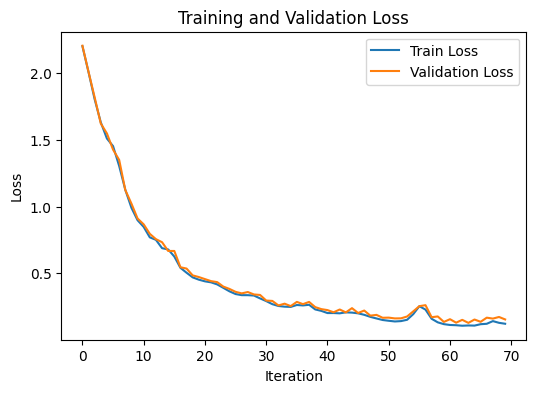

Classification Metrics:
 Accuracy: 0.956
 Precision: 0.961
 Recall: 0.955
 F1-score: 0.956


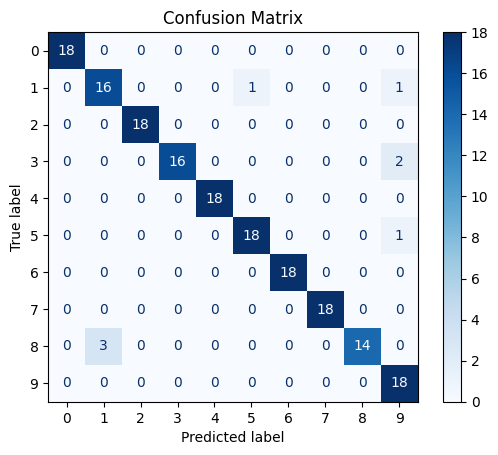


Sample Predictions:
True: 3, Pred: 0.0006
True: 1, Pred: 0.0005
True: 4, Pred: 0.0507
True: 5, Pred: 0.7931
True: 8, Pred: 0.0010
True: 7, Pred: 0.0025
True: 5, Pred: 0.0000
True: 3, Pred: 0.0286
True: 0, Pred: 0.0040
True: 7, Pred: 0.1190


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import report
from models import DenseFeedForward
from optimizers import RMSprop, categorical_cross_entropy, compute_gradient

#load data
digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target  # integers 0-9
#normalize!
X = X / 16.0

#split data using our own test train split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

num_classes = len(np.unique(y_train))
y_train_oh = np.eye(num_classes)[y_train]
y_val_oh   = np.eye(num_classes)[y_val]
y_test_oh  = np.eye(num_classes)[y_test]
#debugging output added by chat gpt
print(f"[DEBUG] Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
print(f"[DEBUG] Classes: {num_classes}")
#model
mlp_model = DenseFeedForward(
    input_dim=X_train.shape[1],
    hidden_layers=[64,32],  # keep small to make FD feasible
    output_dim=num_classes,
    hidden_activation="relu",
    output_activation="softmax"
)
print(f"[DEBUG] Model parameter count: {mlp_model.num_params()}")
#optimizer
optimizer = RMSprop(lr=0.005, beta=0.9, eps=1e-8, l2=0.0001, early_stopping_patience=None)

def train_fullbatch(model, optimizer, loss_fn, X_train, y_train, X_val, y_val,
                    max_iters=20, eps=1e-4, two_sided=False):
    train_losses, val_losses = [], []
    base_loss = loss_fn(model.forward(X_train), y_train)

    for it in range(max_iters):
        grad = compute_gradient(model, loss_fn, X_train, y_train, eps=eps, two_sided=two_sided)
        optimizer.step(model, grad)

        y_train_pred = model.forward(X_train)
        y_val_pred = model.forward(X_val)

        train_loss = loss_fn(y_train_pred, y_train)
        val_loss = loss_fn(y_val_pred, y_val)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Iter {it:03d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

        if optimizer.early_stopping_patience and len(val_losses) > optimizer.early_stopping_patience:
            if val_losses[-1] > np.mean(val_losses[-optimizer.early_stopping_patience:-1]):
                print(f"[DEBUG] Early stopping at iter {it}, val_loss={val_loss:.4f}")
                break

    return train_losses, val_losses

train_losses, val_losses = train_fullbatch(
    mlp_model,
    optimizer,
    categorical_cross_entropy,
    X_train, y_train_oh,
    X_val, y_val_oh,
    max_iters=70,
    eps=1e-4,
    two_sided=False
)

#evaluation to compare
y_pred_probs = mlp_model.forward(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
#accuracy metric
accuracy = (y_pred == y_test).mean()
print(f"\n[RESULT] Digits Test Accuracy: {accuracy:.3f}")

#report
report.report(model=mlp_model,X_test=X_test,y_test=y_test,y_pred=y_pred_probs,task="multiclass_classification",train_losses=train_losses,
    val_losses=val_losses,
    save_path="output/digits_mlp"
)


In [ ]:
#I left the old code that tried to do the above multi-class classification on the MNIST data, 
#so I just kept it on the code for submission, but Dr. Hickman's note on google spaces said I can use the digits dataset as an alternative!

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import report
# from models import DenseFeedForward
# from optimizers import SGD, categorical_cross_entropy, compute_gradient

# X_train, y_train, X_val, y_val, X_test, y_test = load_mnist_from_npz(
#     "data/mnist.npz", val_ratio=0.1, test_ratio=0.1
# )

# # One-hot encode labels
# num_classes = len(np.unique(y_train))
# y_train_oh = np.eye(num_classes)[y_train]
# y_val_oh   = np.eye(num_classes)[y_val]
# y_test_oh  = np.eye(num_classes)[y_test]

# # subsample training set to save time
# subset_size = 500  # pick between 2000-5000 to keep runtime manageable
# subset_idx = np.random.choice(len(X_train), size=subset_size, replace=False)
# X_train = X_train[subset_idx]
# y_train_oh = y_train_oh[subset_idx]

# print(f"[DEBUG] Using subset of size {subset_size}. New training shape: {X_train.shape}")

# #model
# mlp_model = DenseFeedForward(
#     input_dim=X_train.shape[1],
#     hidden_layers=[64],  # use small model for dev (can increase to [128,64] later)
#     output_dim=num_classes,
#     hidden_activation="relu",
#     output_activation="softmax"
# )
# print(f"[DEBUG] Model parameter count: {mlp_model.num_params()}")

# optimizer = RMSprop(lr=0.002,beta=0.9,eps=1e-8,l2=0.0001,early_stopping_patience=15)

# # Train with mini-batch finite differences
# train_losses, val_losses = train(
#     mlp_model,
#     optimizer,
#     categorical_cross_entropy,
#     X_train, y_train_oh,
#     X_val, y_val_oh,
#     max_iters=10, 
#     eps=1e-4,
#     two_sided=False
# )

# #evlaute performance
# y_pred_probs = mlp_model.forward(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)

# print(f"\n[RESULT] MNIST Test Accuracy: {(y_pred == y_test).mean():.3f}")

# report.report(
#     model=mlp_model,
#     X_test=X_test,
#     y_test=y_test,
#     y_pred=y_pred_probs,
#     task="multiclass_classification",
#     train_losses=train_losses,
#     val_losses=val_losses,
#     save_path="output/mnist_mlp"
# )


[DEBUG] Keys: ['X_train', 'y_train']
[DEBUG] Shapes -> Train: (48000, 784), Val: (6000, 784), Test: (6000, 784)
[DEBUG] Using subset of size 500. New training shape: (500, 784)
[DEBUG] Model parameter count: 50890
Iter 000 | Train Loss: 1.884982 | Val Loss: 1.905568


KeyboardInterrupt: 

In [ ]:
# #Case 3: MNIST for Multi-Class Classification
# #utilizing in-class code 
# #load data 
# data = np.load("data/mnist.npz")
# print("[DEBUG] Keys:", data.files)
# #split data asked chatgpt how to split this dataset
# X_train, y_train, X_val, y_val, X_test, y_test = load_mnist_from_npz("data/mnist.npz")
# #one-hot encoding 
# num_classes = len(np.unique(y_train))
# y_train_oh = np.eye(num_classes)[y_train]
# y_val_oh   = np.eye(num_classes)[y_val]
# y_test_oh  = np.eye(num_classes)[y_test]
# #model
# mlp_model = DenseFeedForward(X_train.shape[1], hidden_layers=[64],output_dim=num_classes,hidden_activation="relu",output_activation="softmax")
# #optimizer
# optimizer = SGD(lr=0.01, momentum=0.8, l2=0.001, early_stopping_patience=15)
# #train
# train_losses, val_losses = train(mlp_model,optimizer,categorical_cross_entropy,X_train,y_train_oh,X_val,y_val_oh,max_iters=20,eps=1e-4,two_sided=True)
# #evaluate 
# y_pred_probs = mlp_model.forward(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)
# accuracy = (y_pred == y_test).mean()
# print(f"\n[RESULT] MNIST Test Accuracy: {accuracy:.3f}")
# #report
# report.report(
#     model=mlp_model,
#     X_test=X_test,
#     y_test=y_test_oh,
#     y_pred=y_pred_probs,
#     task="multiclass_classification",
#     train_losses=train_losses,
#     val_losses=val_losses,
#     save_path="output/mnist_mlp"
# )


[DEBUG] Keys: ['X_train', 'y_train']
[DEBUG] Keys: ['X_train', 'y_train']
[DEBUG] Shapes -> Train: (48000, 784), Val: (6000, 784), Test: (6000, 784)


KeyboardInterrupt: 